In [1]:
from keras.layers import Input, Dense
from keras.models import Model

encoding_dim = 32
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

Using TensorFlow backend.


In [2]:
encoder = Model(input_img, encoded)

In [3]:
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [4]:
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')

In [5]:
from keras.datasets import mnist
import numpy as np
(x_train,_), (x_test,_) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


In [6]:
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_train.reshape((len(x_train), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(60000, 784)


In [8]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True\
               ,validation_data=(x_test, x_test))

Train on 60000 samples, validate on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 88us/step - loss: 0.3692 - val_loss: 0.2713
Epoch 2/50
60000/60000 [==============================] - 5s 77us/step - loss: 0.2622 - val_loss: 0.2515
Epoch 3/50
60000/60000 [==============================] - 5s 76us/step - loss: 0.2402 - val_loss: 0.2294
Epoch 4/50
60000/60000 [==============================] - 5s 76us/step - loss: 0.2208 - val_loss: 0.2131
Epoch 5/50
60000/60000 [==============================] - 5s 77us/step - loss: 0.2069 - val_loss: 0.2012
Epoch 6/50
60000/60000 [==============================] - 5s 77us/step - loss: 0.1964 - val_loss: 0.1920
Epoch 7/50
60000/60000 [==============================] - 5s 77us/step - loss: 0.1882 - val_loss: 0.1847
Epoch 8/50
60000/60000 [==============================] - 5s 76us/step - loss: 0.1815 - val_loss: 0.1785
Epoch 9/50
60000/60000 [==============================] - 5s 77us/step - loss: 0.1759 - val_loss: 0.1733
Epoch

In [10]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

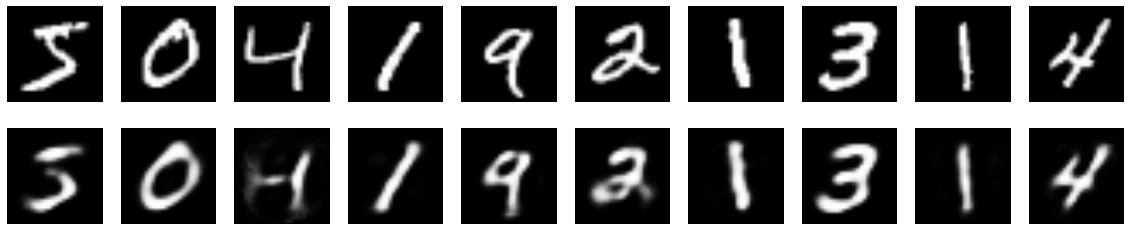

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()